# Logistic Distribution
---

- The logistic distribution is a continuous probability distribution used in various statistical models, especially those involving logistic regression and other forms of regression analysis. It's frequently used in situations where data are dichotomous, meaning there are two possible outcomes (like success/failure, yes/no, win/lose), and where the likelihood of an outcome changes as an underlying predictor variable increases.

## Major key characteristics of the logistic distribution:

### 1. Shape:
The probability density function (PDF) of the logistic distribution is similar to the normal distribution but with heavier tails. This shape provides more flexibility in modeling real-world phenomena where extreme outcomes are more probable than would be predicted by the normal distribution.

### 2. Formula:

The PDF of the logistic distribution is given by the formula, with $\mu$ being the mean, and $s$ being the scale parameter:
\begin{equation}
f(x) = \frac{e^{-\frac{x-\mu}{s}}}{s(1+e^{-\frac{x-\mu}{s}})^2}
\end{equation}

### 3. Cumulative Distribution Function (CDF):

The CDF, which describes the probability that a random variable drawn from the distribution is less than or equal to a certain value:

\begin{equation}
F(x) = \frac{1}{1+e^{-\frac{x-\mu}{s}}}
\end{equation}

This sigmoidal shape of the CDF makes the logistic distribution useful in logistic regression, where it models the probability of a binary response as a function of explanatory variables.

Applications: Beyond logistic regression, the logistic distribution is used in various fields such as economics for modeling growth, in ecology for population studies, and in medicine for dose-response models.


## Applications

Beyond logistic regression, the logistic distribution is used in various fields such as economics for modeling growth, in ecology for population studies, and in medicine for dose-response models.

# Logistic Regression
---

- Logistic regression is a statistical method used for predicting the probability of a binary outcome. It is a type of regression analysis that is particularly useful when the dependent variable is categorical (usually dichotomous, meaning two possible outcomes like yes/no, win/lose, alive/dead). Logistic regression estimates the parameters of a logistic model and is a form of binomial regression.

## Major key characteristics of the logistic distribution:

- Binary Outcomes: The classic use of logistic regression is for binary outcomes, which might represent occurrences such as pass/fail, default/no default, or sick/healthy.

- Odds and Log-Odds: Logistic regression models the log-odds of the probability that the dependent variable equals a certain value. For a binary dependent variable, this value is usually 1 (the event happens) as opposed to 0 (the event does not happen).

- Sigmoid Function: The core of logistic regression is the logistic function or sigmoid function. This function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits. This mapping makes it suitable for modeling a probability distribution.

\begin{equation}
\sigma(t) = \frac{1}{1+e^{-t}}
\end{equation}

NOTE THAT: $t$ can be a linear combination of independent variables $t = \beta_0 + \beta_1 \cdotp x_1 + ... + \beta_n \cdotp x_n$

- Interpretation of Coefficients: The coefficients in logistic regression are interpreted as odds ratios. Example, given $t = \beta_0 + \beta_1 \cdotp x_1 + ... + \beta_n \cdotp x_n = 0 + 0.5 \cdotp x_1 = 0.5 \cdotp x_1$
\begin{equation}
\sigma(t) = \frac{1}{1+e^{-(0.5 \cdotp x_1)}}
\end{equation}

The above logistic regression can be interpreted as  for every one unit increase of $x_1$ increases the odds of the dependent event by $e^{0.5}$

## Advantages and Limitations: 

- One of the key advantages of logistic regression is its ability to provide probabilities and classify new samples using continuous and categorical data. However, it assumes a linear relationship between the log-odds of the dependent variable and each predictor variable. Logistic regression also requires large sample sizes to achieve high accuracy and can be sensitive to overfitting especially with high-dimensional data.

# Is logisitic regression a "regression" or a "classification"?
---

- Logistic regression is primarily a regression technique by its method of estimating the relationship between variables. However, it is frequently used as a classification tool in practical applications, especially when the objective is to determine which category an observation belongs to based on given predictors. This dual nature makes logistic regression a versatile tool in both statistical modeling and machine learning.

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
## Data
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
# Requires internet connection
mammographic_mass = fetch_ucirepo(id=161) 
  
# data (as pandas dataframes) 
X = mammographic_mass.data.features 
y = mammographic_mass.data.targets 

In [37]:
# variable information 
print(mammographic_mass.variables) 

       name     role     type demographic description units missing_values
0   BI-RADS  Feature  Integer        None        None  None            yes
1       Age  Feature  Integer         Age        None  None            yes
2     Shape  Feature  Integer        None        None  None            yes
3    Margin  Feature  Integer        None        None  None            yes
4   Density  Feature  Integer        None        None  None            yes
5  Severity   Target   Binary        None        None  None             no


In [38]:
df = pd.merge(X, y, left_index=True, right_index=True)

In [39]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


### Exploratory Data Analysis and Visualization

Feel free to explore the data further on your own.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [41]:
(df.isna().sum()/len(df))*100

BI-RADS     0.208117
Age         0.520291
Shape       3.225806
Margin      4.994797
Density     7.908429
Severity    0.000000
dtype: float64

In [43]:
df = df.dropna()

In [44]:
(df.isna().sum()/len(df))*100

BI-RADS     0.0
Age         0.0
Shape       0.0
Margin      0.0
Density     0.0
Severity    0.0
dtype: float64

In [45]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


<Axes: xlabel='Severity', ylabel='count'>

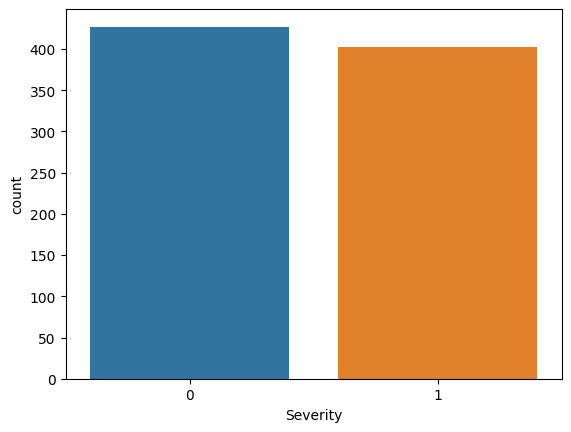

In [46]:
sns.countplot(data=df,x='Severity')

<Axes: xlabel='Severity', ylabel='Age'>

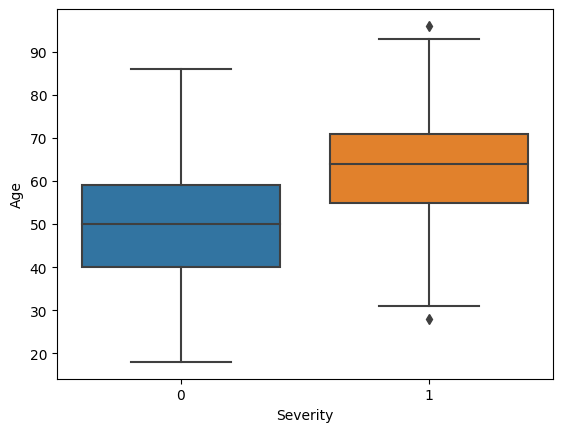

In [47]:
sns.boxplot(x='Severity',y='Age',data=df)

<Axes: xlabel='Severity', ylabel='BI-RADS'>

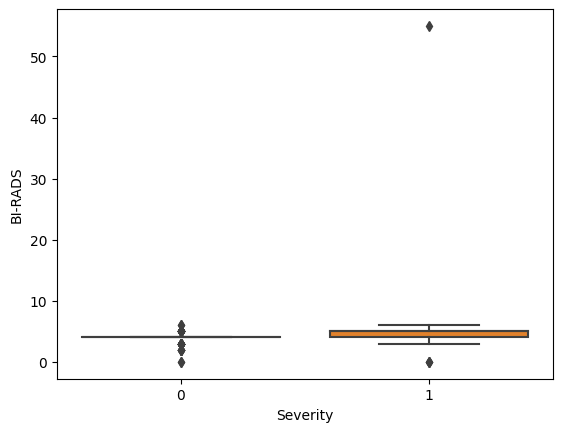

In [52]:
sns.boxplot(x='Severity',y='BI-RADS',data=df)

<Axes: xlabel='Age', ylabel='BI-RADS'>

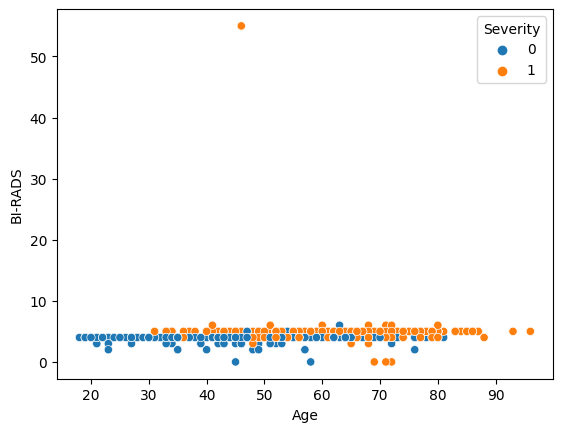

In [56]:
sns.scatterplot(x='Age',y='BI-RADS',data=df,hue='Severity')

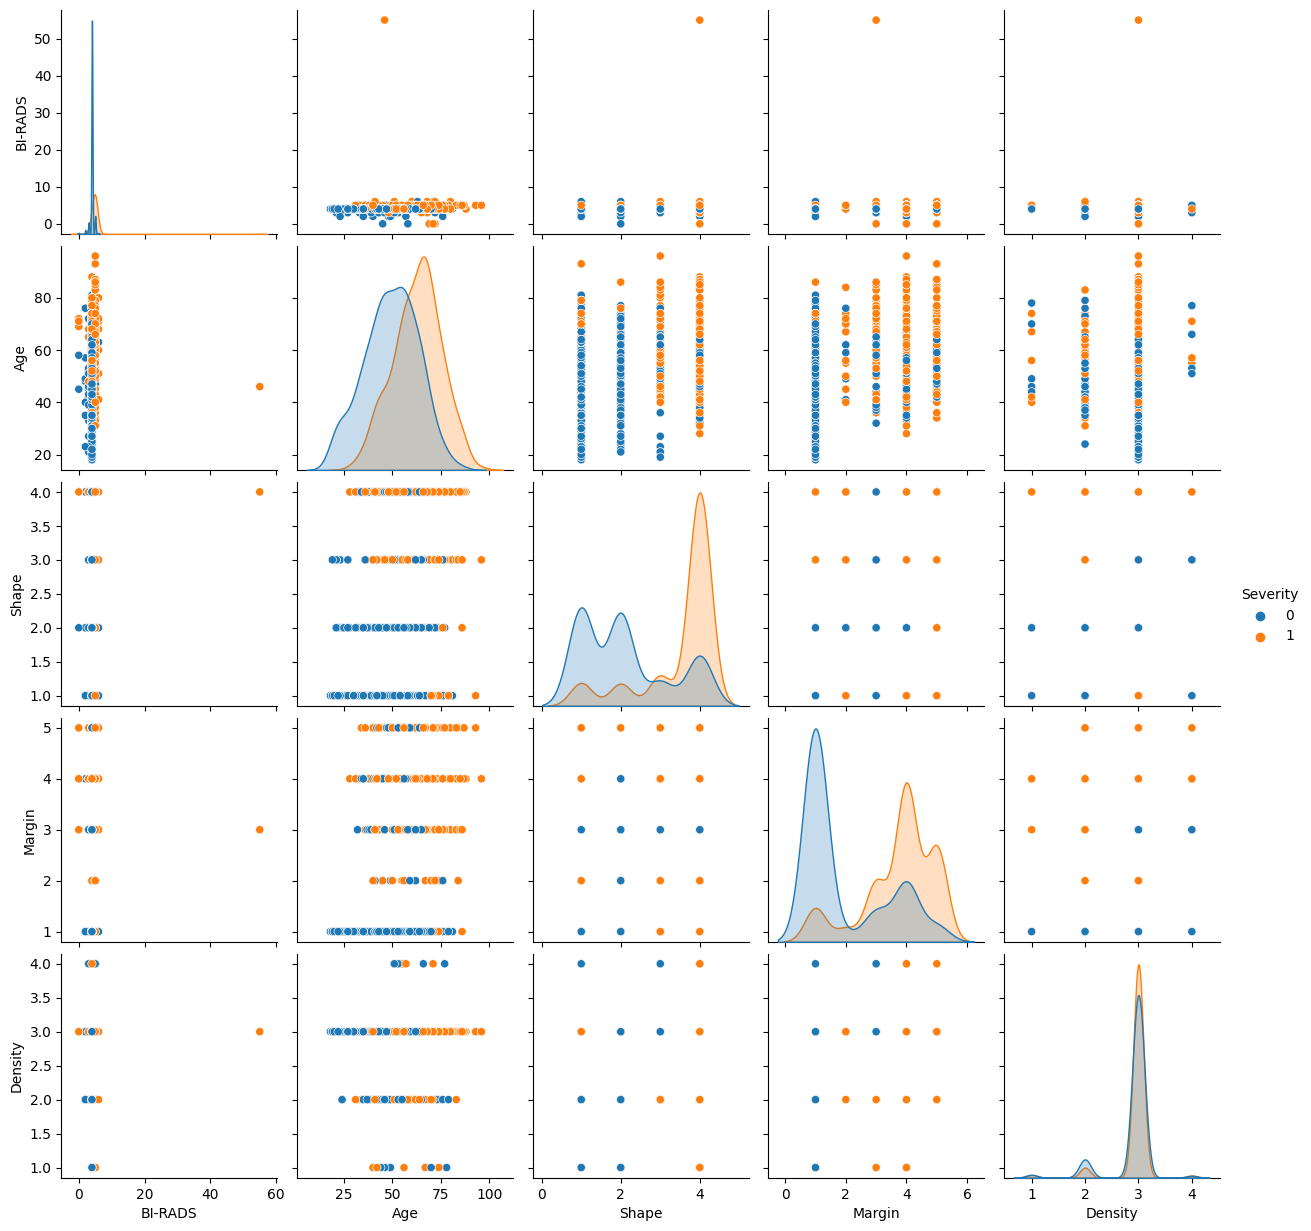

In [57]:
sns.pairplot(df,hue='Severity')

<Axes: >

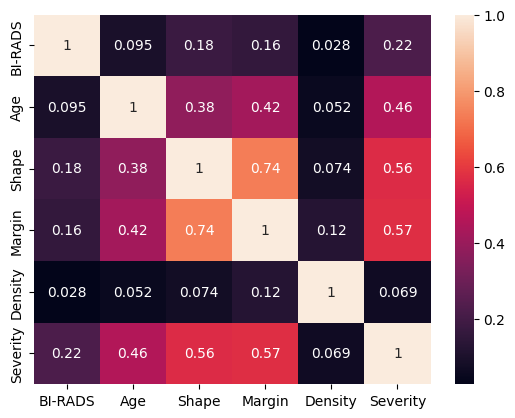

In [58]:
sns.heatmap(df.corr(),annot=True)

### Train | Test Split and Scaling

In [62]:
X = df.drop('Severity',axis=1)
y = df['Severity']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [65]:
scaler = StandardScaler()

In [66]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
# help(LogisticRegression)

In [69]:
# help(LogisticRegressionCV)

In [70]:
log_model = LogisticRegression()

In [71]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

### Coefficient Interpretation

Things to remember:

* These coeffecients relate to the *odds* and can not be directly interpreted as in linear regression.
* We trained on a *scaled* version of the data 
* It is much easier to understand and interpret the relationship between the coefficients than it is to interpret the coefficients relationship with the probability of the target/label class.

Make sure to watch the video explanation, also check out the links below:

* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### The odds ratio

For a continuous independent variable the odds ratio can be defined as:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

This exponential relationship provides an interpretation for $$\beta _{1}$$ 

The odds multiply by $${e^\beta _{1}}$$ for every 1-unit increase in x.

In [90]:
coef = list(log_model.coef_[0])
coef

[0.9580579449255238,
 0.7405071208395729,
 0.5971920496894438,
 0.4883262282221562,
 -0.019340262743118494]

In [91]:
names = list(df.columns)
names

['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']

In [92]:
OR = {}
for key in names:
    for value in coef:
        OR[key] = value
        coef.remove(value)
        break
OR

{'BI-RADS': 0.9580579449255238,
 'Age': 0.7405071208395729,
 'Shape': 0.5971920496894438,
 'Margin': 0.4883262282221562,
 'Density': -0.019340262743118494}

This means:
* We can expect the **odds** of severity to **increase** per unit increase of BI-RADS.
* We can expect the **odds** of severity to **increase** per unit increase of age.
* We can expect the **odds** of severity to **increase** per unit increase of shape.
* We can expect the **odds** of severity to **increase** per unit increase of margin.
* We can expect the **odds** of severity to **Decrease** per unit increase of Density. $\leftarrow \textbf{This is interesting, and unexpected, why?}$
* Based on the ratios with each other, the BI-RADS indicator is a stronger predictor, even if it has a weak correlation coefficient.

### Model Performance on Classification Tasks

In [95]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [96]:
y_pred = log_model.predict(scaled_X_test)

In [97]:
accuracy_score(y_test,y_pred)

0.8313253012048193

In [98]:
confusion_matrix(y_test,y_pred)

array([[39,  8],
       [ 6, 30]])

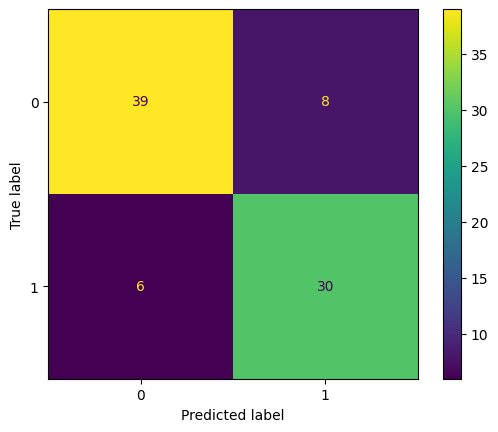

In [102]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

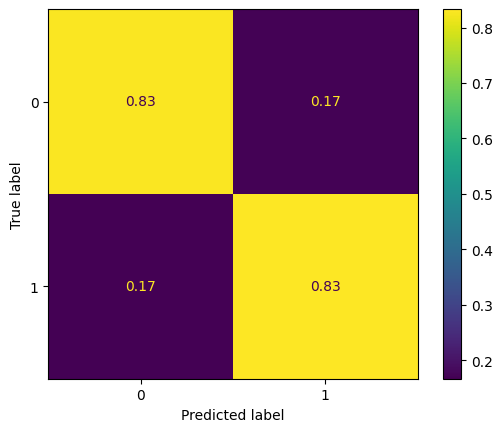

In [103]:
# Scaled so highest value=1
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        47
           1       0.79      0.83      0.81        36

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83



In [105]:
X_train.iloc[0]

BI-RADS     4.0
Age        46.0
Shape       2.0
Margin      3.0
Density     3.0
Name: 206, dtype: float64

In [106]:
y_train.iloc[0]

0

In [107]:
# 0% probability of 0 class
# 100% probability of 1 class
log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [108]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

## Evaluating Curves and AUC

**Make sure to watch the video on this!**

In [111]:
from sklearn.metrics import precision_recall_curve,PrecisionRecallDisplay,RocCurveDisplay

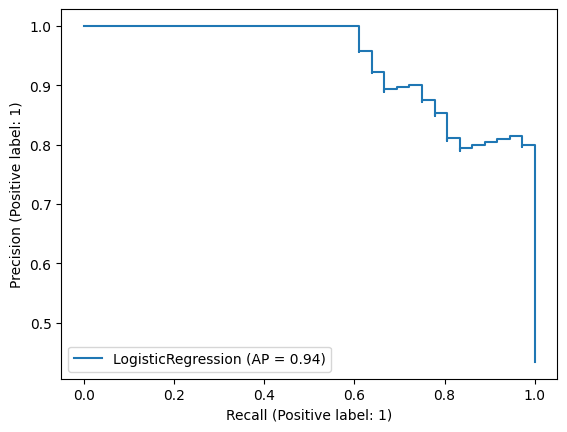

In [113]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

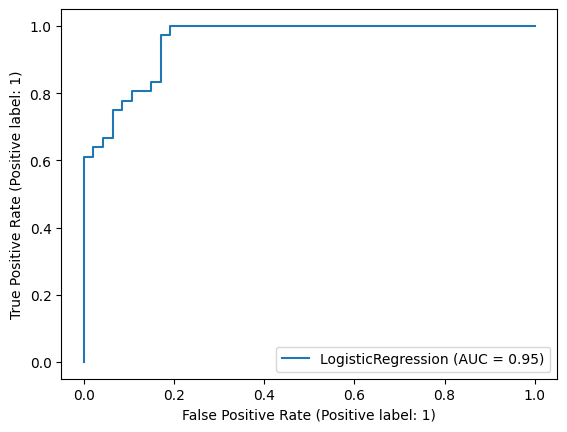

In [114]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

------
------